In [118]:
import httplib
import urllib
import base64
import json
import ijson
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

# you have to sign up for an API key, which has some allowances. Check the API documentation for further details:
_url = 'https://api.projectoxford.ai/emotion/v1.0/recognizeInVideo'
_key = 'your key here' #Here you have to paste your primary key
_maxNumRetries = 10




In [119]:
paramsPost = urllib.urlencode({'outputStyle' : 'perFrame', 'file':'/Volumes/data/Movies/gots7.mp4'})

headersPost = dict()
headersPost['Ocp-Apim-Subscription-Key'] = _key
headersPost['Content-Type'] = 'application/octet-stream'
jsonGet={}
headersGet = dict()
headersGet['Ocp-Apim-Subscription-Key'] = _key
paramsGet = urllib.urlencode({}) 

responsePost = requests.request( 'post', _url + "?" + paramsPost, \
                                data = open('/Volumes/data/Movies/gots7.mp4','rb').read(), \
                                headers = headersPost)

print responsePost.status_code







202


In [120]:
videoIDLocation = responsePost.headers['Operation-Location']
print videoIDLocation

https://api.projectoxford.ai/emotion/v1.0/operations/77b76f14-7062-42c0-80fc-4220b8e42695


In [121]:
getResponse = requests.request( 'get', videoIDLocation, \
                                  data = None, headers = headersGet, params = paramsGet )

rawData = json.loads(json.loads(getResponse.text)['processingResult'])



In [123]:
emotionPerFramePerFace = {}
currFrameNum = 0

for currFragment in rawData['fragments']:
    if 'events' in currFragment:
        for currEvent in currFragment['events']:
            emotionPerFramePerFace[currFrameNum] = currEvent
            currFrameNum += 1


In [125]:
print emotionPerFramePerFace[0]

[{u'height': 0.461111, u'width': 0.259375, u'scores': {u'sadness': 0.490348, u'neutral': 0.50085, u'contempt': 0.00298951, u'disgust': 0.00246058, u'anger': 0.000952272, u'surprise': 0.000819597, u'fear': 0.00130964, u'happiness': 0.000270213}, u'y': -0.0388889, u'x': 0.540625, u'id': 0}]


In [126]:
gotemotions = []
for frame_no, v in emotionPerFramePerFace.copy().items():
    for i, minidict in enumerate(v):
        for k, v in minidict['scores'].items():
            minidict[k] = v
        minidict['frame'] = frame_no
        gotemotions.append(minidict)
            

In [127]:
dfgot = pd.DataFrame(gotemotions)

In [136]:
dfgot.describe()

,anger,contempt,disgust,fear,frame,happiness,height,id,neutral,sadness,surprise,width,x,y
count,993.000000,993.000000,9.930000e+02,9.930000e+02,993.000000,9.930000e+02,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,0.036747,0.003811,3.843246e-03,1.164629e-02,444.794562,6.035468e-02,0.357830,4.407855,0.774471,0.063553,0.045574,0.201279,0.444787,0.195359
std,0.097501,0.007878,1.130599e-02,3.588751e-02,246.452917,1.160212e-01,0.175798,3.574075,0.233285,0.124912,0.118813,0.098886,0.174347,0.077487
min,0.000001,0.000002,5.910130e-08,1.446170e-08,0.000000,8.663520e-10,0.116667,0.000000,0.007790,0.000016,0.000001,0.065625,0.067187,-0.038889
25%,0.000629,0.000260,1.316400e-04,7.428330e-05,224.000000,3.057380e-04,0.197222,3.000000,0.637576,0.007302,0.000441,0.110937,0.320313,0.150000
50%,0.003500,0.001087,5.186400e-04,6.878760e-04,459.000000,5.902920e-03,0.330556,3.000000,0.880521,0.021362,0.002675,0.185937,0.428125,0.205556
75%,0.017425,0.003178,1.692700e-03,7.126220e-03,698.000000,7.573680e-02,0.491667,5.000000,0.952891,0.057075,0.023164,0.276563,0.551562,0.236111
max,0.725070,0.119641,1.232710e-01,3.140850e-01,841.000000,8.289610e-01,0.894444,12.000000,0.999834,0.960550,0.745963,0.503125,0.875000,0.394444


In [132]:
emotions = dfgot[['anger', 'contempt', 'disgust', 'fear', 'happiness', 'sadness', 'surprise']]
emotions.head()

,anger,contempt,disgust,fear,happiness,sadness,surprise
0,0.000952,0.002990,0.002461,0.001310,0.000270,0.490348,0.000820
1,0.001265,0.004934,0.002183,0.000721,0.000518,0.447253,0.000515
2,0.000557,0.001987,0.000673,0.000154,0.000274,0.160957,0.000323
3,0.000372,0.001852,0.000673,0.000261,0.000766,0.069445,0.000772
4,0.000510,0.002643,0.001578,0.000324,0.001119,0.112447,0.000858


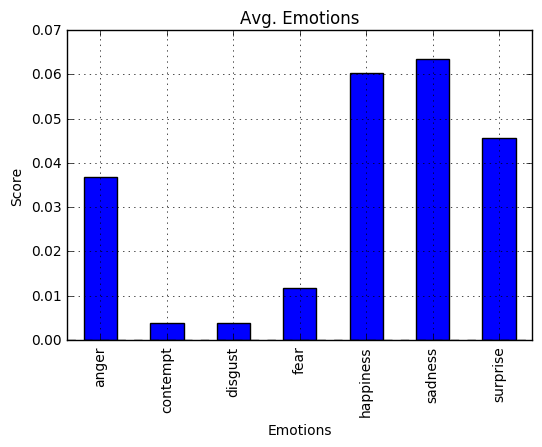

In [135]:
avgemotion = emotions.mean()
avg_plot = avgemotion.plot(kind='bar', legend=None, title='Avg. Emotions')
avg_plot.set_xlabel('Emotions')
avg_plot.set_ylabel('Score')